<h1>Taller ODE Con Métodos Numéricos</h1>
<h2>Juan Pablo Peñaloza, Nicolás Miranda, William Moreno y Johan Murillo</h2>

<h3>1.</h3>

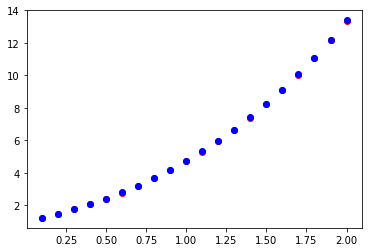

In [1]:
from pylab import *
from mpmath import odefun, cos, sin, mpf, sinc, mp


def f(x,y):
    return y + x - x**2 +1


def realSol(x):
    g = odefun(lambda x, y: y + x - x**2 +1, 0, 1)
    return g(x)
    
def euler(f, x, y, h, m):
    u = []
    v = []
    for i in range(m):
        k1 = h * f(x,y)
        k2 = h * f(x+ h, y + k1)
        y = y + (0.5)*(k1 + k2)
        x = x + h
        u = u + [x]
        v = v + [y]
    return [u,v]

[u,v] = euler(f,0,1,0.1,20)
realV = [];
for i in u:
    realV.append(realSol(i))

plot(u,v,'or')
plot(u,realV,'ob')
show()

<h3>2.</h3>

H:  0.1
T1:  0.1
T0:  0.0


/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in double_scalars
  


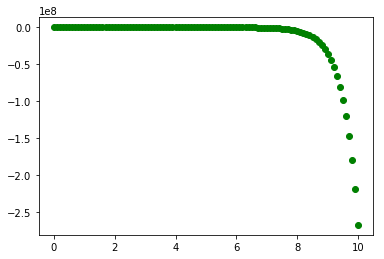

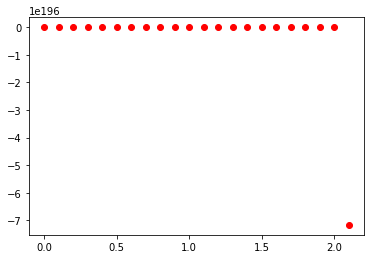

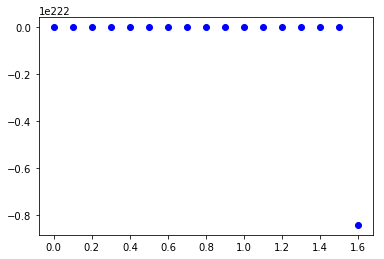

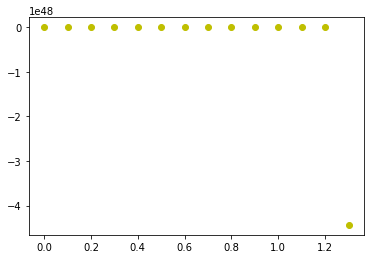

'\n    CONCLUSION:\n    Si comparamos las aproximaciones con la grafica real, no se podria apreciar los diferentes resultados.\n    Las aproximaciones no son muy buenas como podemos ver, masomenos demuestran el comportamiento de la \n    solucion real, pero en cuanto a los valores reales son muy lejanos de la realidad.\n'

In [46]:
import numpy
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from pylab import *
from mpmath import odefun, cos, sin, mpf, sinc, mp

def f2(x,y):
    return 2*y - 2*x**2 + x - 3

def realSol(x):
    g = odefun(lambda x, y: 2*y - 2*x**2 + x - 3, 0.0, 1.2)
    return g(x)

def getRealSolutionArray(t):
    x = []
    for i in t:
        x.append(realSol(i))
    return x

def heun( f, x0, t ):
    n = len( t )
    x = numpy.array( [x0] * n )
    for i in range( n - 1 ):
        h = t[i+1] - t[i]
        k1 = h * f( x[i], t[i] )
        k2 = h * f( x[i] + k1, t[i+1] )
        x[i+1] = x[i] + ( k1 + k2 ) / 2.0

    return x

def euler( f, x0, t ):
    n = len( t )
    x = numpy.array( [x0] * n )
    for i in range( n - 1 ):
        x[i+1] = x[i] + ( t[i+1] - t[i] ) * f( x[i], t[i] )

    return x

def rk4( f, x0, t ):
    n = len( t )
    x = numpy.array( [ x0 ] * n )
    for i in range( n - 1 ):
        h = t[i+1] - t[i]
        k1 = h * f( x[i], t[i] )
        k2 = h * f( x[i] + 0.5 * k1, t[i] + 0.5 * h )
        k3 = h * f( x[i] + 0.5 * k2, t[i] + 0.5 * h )
        k4 = h * f( x[i] + k3, t[i+1] )
        x[i+1] = x[i] + ( k1 + 2.0 * ( k2 + k3 ) + k4 ) / 6.0

    return x

a, b = ( 0.0, 10.0 )
x0 = 1.2
n = 101
t = numpy.linspace( a, b, n )
h = t[1] - t[0];
print("H: ", h)
print("T1: ", t[1])
print("T0: ", t[0])

x_euler = euler( f2, x0, t )
x_heun = heun( f2, x0, t )
x_rk4 = rk4( f2, x0, t )
real = getRealSolutionArray(t)

figure(1)
plot(t,real,'og')

figure(2)
plot(t,x_euler,'or')

figure(3)
plot(t,x_heun,'ob')

figure(4)
plot(t,x_rk4,'oy')
show()

'''
    CONCLUSION:
    Si comparamos las aproximaciones con la grafica real, no se podria apreciar los diferentes resultados.
    Las aproximaciones no son muy buenas como podemos ver, masomenos demuestran el comportamiento de la 
    solucion real, pero en cuanto a los valores reales son muy lejanos de la realidad.
'''

<h3>3.</h3>

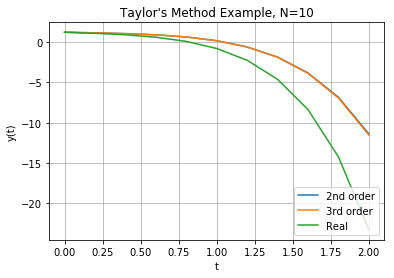

'\nCONCLUSIÓN:\nEntre todos los métodos para esta ecuación diferencial el mas correcto fue por serie de T\n'

In [44]:
def factorial( n ):
    if n == 0:
        return 1
    fact = 1
    for i in range( 1, n+1 ):
        fact *= i
    return fact
 
def taylor_mthd( f, a, b, N, IV ):
    h = (b-a)/float(N)                  # determine step-size
    t = np.arange( a, b+h, h )          # create mesh
    w = np.zeros((N+1,))                # initialize w
    t[0], w[0] = IV                     # set initial values
    for i in range(1,N+1):              # apply Euler's method
        T = 0
        for j in range(len(f)):
            h_factor = h**(j)/float(factorial(j+1))
            T += h_factor * f[j]( t[i-1], w[i-1] )
        w[i] = w[i-1] + h * T
    return w
a, b = 0.0, 2.0
N = 10
h = (b-a)/N
IV = ( 0.0, 1.2 )
t = np.arange( a, b+h, h )
 
f   = lambda x, y: 2*y - 2*x**2 + x - 3
 
w2 = taylor_mthd( [ f, df ], a, b, N, IV )
w3 = taylor_mthd( [ f, df, ddf ], a, b, N,  IV )

plot( t, w2, label='2nd order' )
plot( t, w3, label='3rd order' )
plot(t,getRealSolutionArray(t),label='Real')
title( "Taylor's Method Example, N="+str(N) )
xlabel('t') 
ylabel('y(t)')
legend(loc=4)
grid()
show()
'''
CONCLUSIÓN:
Entre todos los métodos para esta ecuación diferencial el mas correcto fue por serie de Taylor ya que empiezan muy 
parecido y a lo largo de t se van separando pero marca muy adecuadamente el comportamiento de la gráfica.
'''

<h3>4.</h3>

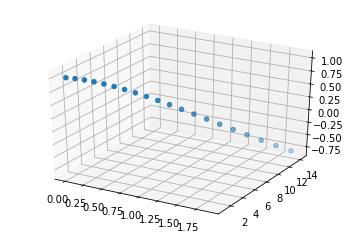

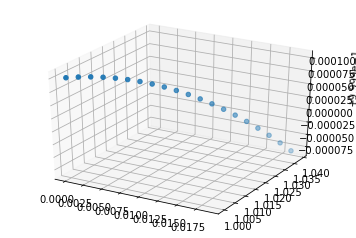

In [72]:
from mpl_toolkits.mplot3d import Axes3D

def f(x,y,z):
    return (x + y + z)
def g(x,y,z):
    return (y - x - y)

def solve(h, n, y0, z0):
    y = numpy.array( [ y0 ] * n )
    z = numpy.array( [ y0 ] * n )
    x = numpy.array( [0.0] * n )
    for i in range(n - 1):
        k1y = h * f(x[i], y[i], z[i])
        k1z = h * g(x[i], y[i], z[i])
        
        k2y = h * f(x[i] + h, y[i] + k1y, z[i] + k1z)
        k2z = h * g(x[i] + h, y[i] + k1y, z[i] + k1z)
        
        y[i+1] = y[i] + 0.5*(k1y + k2y)
        z[i+1] = z[i] + 0.5*(k1z + k2z)
        
        x[i+1] = x[i] + h
    return [x,y,z]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

M = 20
yo = 1.0
zo = 2.0
[x1,y1,z1] = solve(0.1, M, yo, zo)
[x2,y2,z2] = solve(0.001, M, yo, zo)


figure(1)
ax.scatter(x1,y1,z1)

fig2 = plt.figure()
ax2 = fig2.add_subplot(111, projection='3d')
figure(2)
ax2.scatter(x2,y2,z2)

show()


        